In [1]:

import json
import warnings
import re

import numpy as np;
import pandas as pd;
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn import metrics

###  1. Read data file

In [2]:

df = pd.read_csv('parkinsons.data')
df.columns = [i.replace(" ", "_").replace("(%)", "_perc").replace("(dB)", "_db").replace(":", "_").lower() for i in df.columns]
df.columns = [re.sub(r"\((.+)\)", "", i) for i in df.columns]

df

,name,mdvp_fo,mdvp_fhi,mdvp_flo,mdvp_jitter_perc,mdvp_jitter,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### 2. Data Exploration & Missing value analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   mdvp_fo           195 non-null    float64
 2   mdvp_fhi          195 non-null    float64
 3   mdvp_flo          195 non-null    float64
 4   mdvp_jitter_perc  195 non-null    float64
 5   mdvp_jitter       195 non-null    float64
 6   mdvp_rap          195 non-null    float64
 7   mdvp_ppq          195 non-null    float64
 8   jitter_ddp        195 non-null    float64
 9   mdvp_shimmer      195 non-null    float64
 10  mdvp_shimmer_db   195 non-null    float64
 11  shimmer_apq3      195 non-null    float64
 12  shimmer_apq5      195 non-null    float64
 13  mdvp_apq          195 non-null    float64
 14  shimmer_dda       195 non-null    float64
 15  nhr               195 non-null    float64
 16  hnr               195 non-null    float64
 1

In [4]:
df.shape

(195, 24)

In [5]:
df.isnull().sum() # => no null values

name                0
mdvp_fo             0
mdvp_fhi            0
mdvp_flo            0
mdvp_jitter_perc    0
mdvp_jitter         0
mdvp_rap            0
mdvp_ppq            0
jitter_ddp          0
mdvp_shimmer        0
mdvp_shimmer_db     0
shimmer_apq3        0
shimmer_apq5        0
mdvp_apq            0
shimmer_dda         0
nhr                 0
hnr                 0
status              0
rpde                0
dfa                 0
spread1             0
spread2             0
d2                  0
ppe                 0
dtype: int64

In [6]:
df.describe()

,mdvp_fo,mdvp_fhi,mdvp_flo,mdvp_jitter_perc,mdvp_jitter,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### 3. Univariate & bivariate analysis

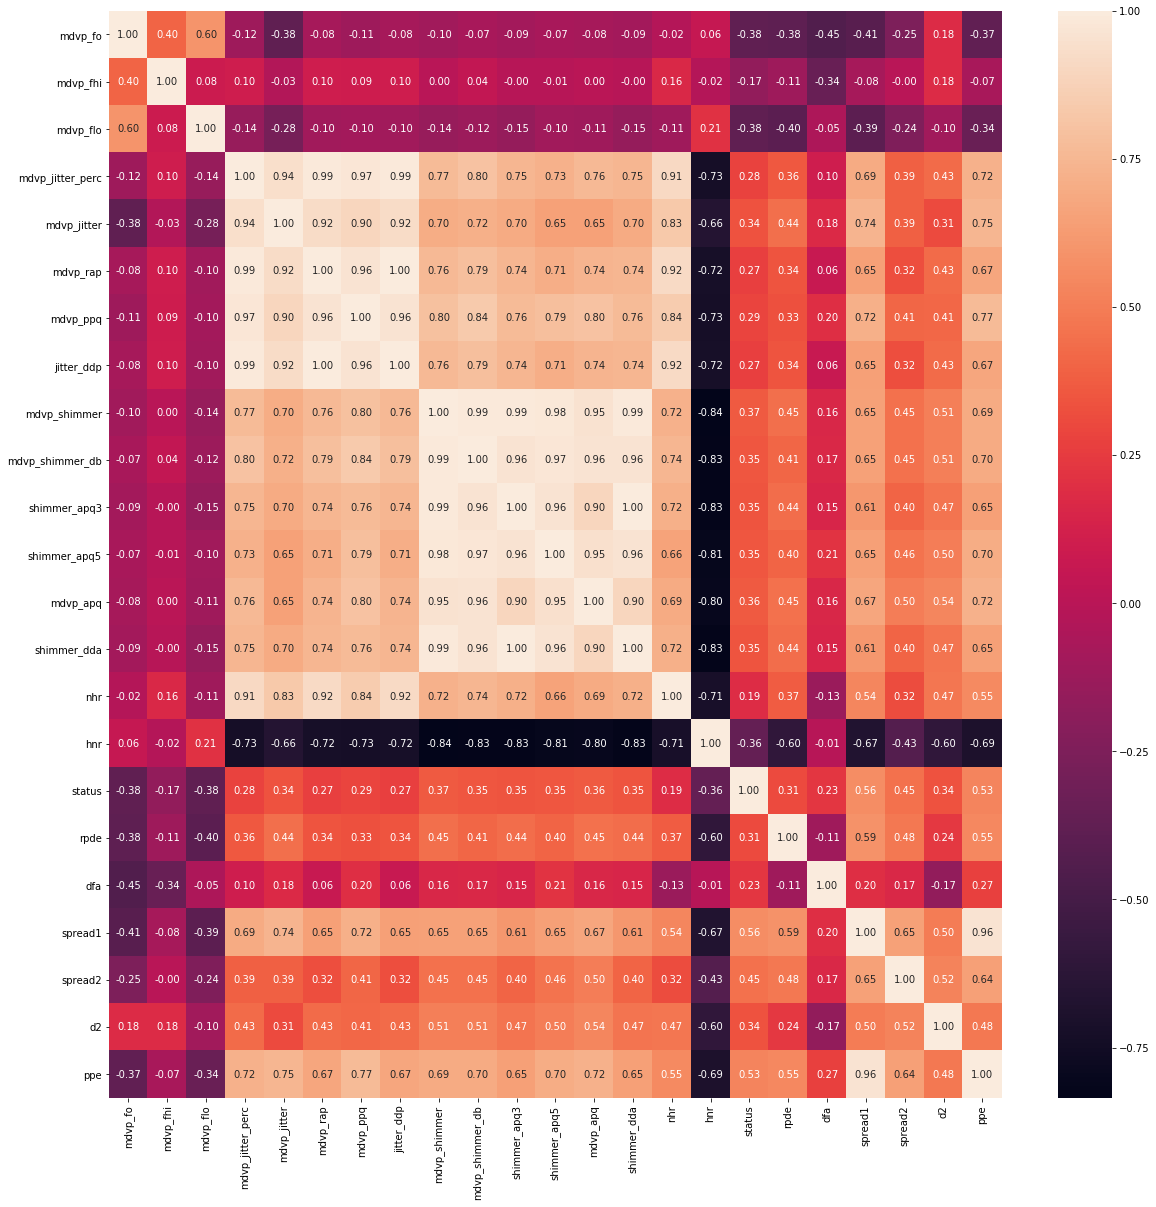

In [7]:
# correlation analysis
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), fmt='.2f', annot=True);

In [8]:
df.name.value_counts() # => no duplicate values found

phon_R01_S22_6    1
phon_R01_S43_5    1
phon_R01_S27_1    1
phon_R01_S17_6    1
phon_R01_S17_3    1
                 ..
phon_R01_S18_2    1
phon_R01_S37_4    1
phon_R01_S04_2    1
phon_R01_S19_1    1
phon_R01_S21_5    1
Name: name, Length: 195, dtype: int64

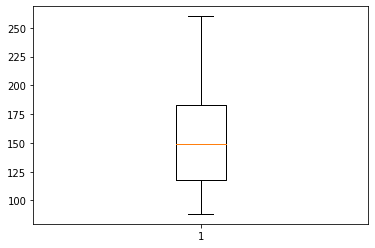

In [9]:
plt.ion()
plt.boxplot(df.mdvp_fo)
plt.pause(0.05)

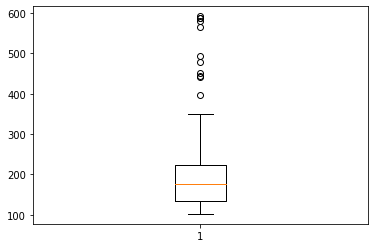

In [10]:
plt.ion()
plt.boxplot(df.mdvp_fhi)
plt.pause(0.05)

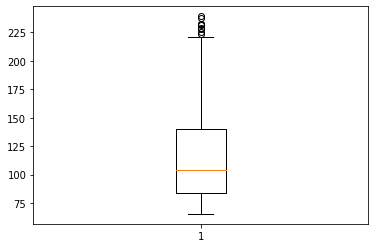

In [11]:
plt.ion()
plt.boxplot(df.mdvp_flo)
plt.pause(0.05)

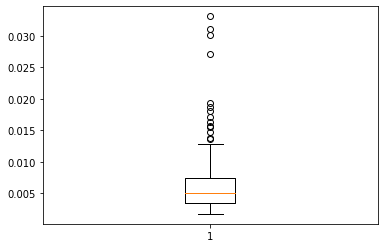

In [12]:
plt.ion()
plt.boxplot(df.mdvp_jitter_perc)
plt.pause(0.05)

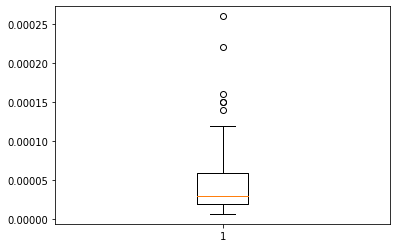

In [13]:
plt.ion()
plt.boxplot(df.mdvp_jitter)
plt.pause(0.05)

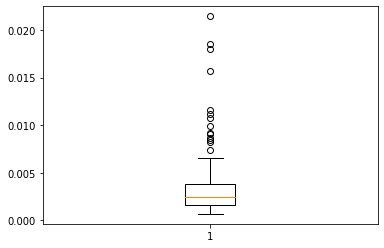

In [14]:
plt.ion()
plt.boxplot(df.mdvp_rap)
plt.pause(0.05)

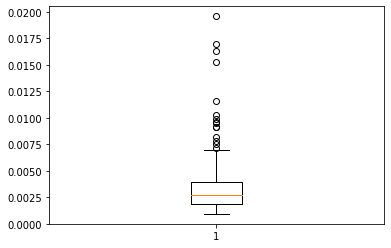

In [15]:
plt.ion()
plt.boxplot(df.mdvp_ppq)
plt.pause(0.05)

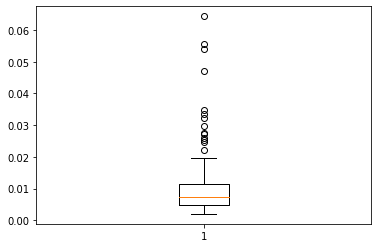

In [16]:
plt.ion()
plt.boxplot(df.jitter_ddp)
plt.pause(0.05)

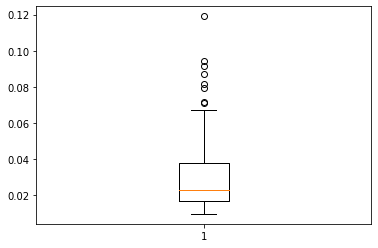

In [17]:
plt.ion()
plt.boxplot(df.mdvp_shimmer)
plt.pause(0.05)

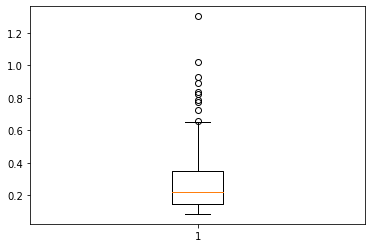

In [18]:
plt.ion()
plt.boxplot(df.mdvp_shimmer_db)
plt.pause(0.05)

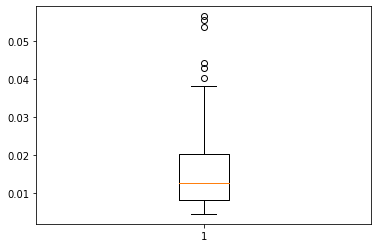

In [19]:
plt.ion()
plt.boxplot(df.shimmer_apq3)
plt.pause(0.05)

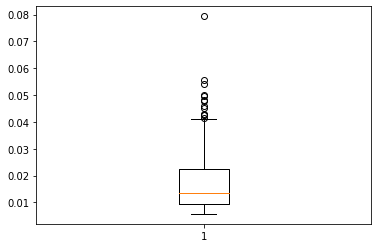

In [20]:
plt.ion()
plt.boxplot(df.shimmer_apq5)
plt.pause(0.05)

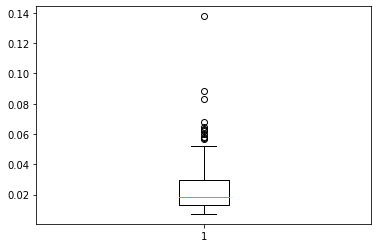

In [21]:
plt.ion()
plt.boxplot(df.mdvp_apq)
plt.pause(0.05)

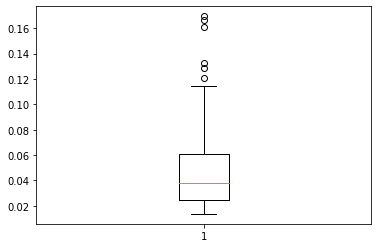

In [22]:
plt.ion()
plt.boxplot(df.shimmer_dda)
plt.pause(0.05)

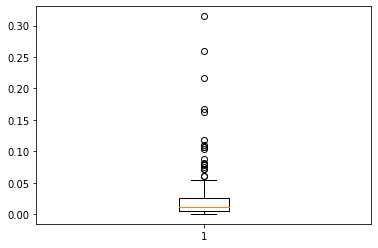

In [23]:
plt.ion()
plt.boxplot(df.nhr)
plt.pause(0.05)

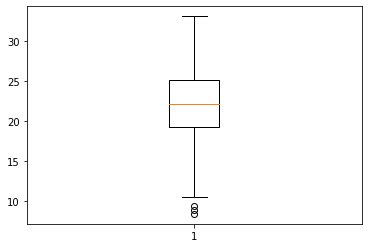

In [24]:
plt.ion()
plt.boxplot(df.hnr)
plt.pause(0.05)

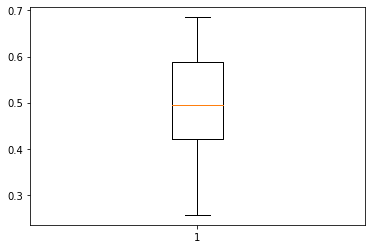

In [25]:
plt.ion()
plt.boxplot(df.rpde)
plt.pause(0.05)

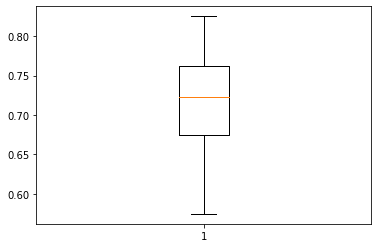

In [26]:
plt.ion()
plt.boxplot(df.dfa)
plt.pause(0.05)

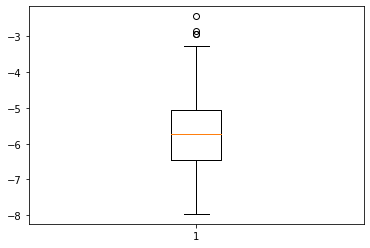

In [27]:
plt.ion()
plt.boxplot(df.spread1)
plt.pause(0.05)

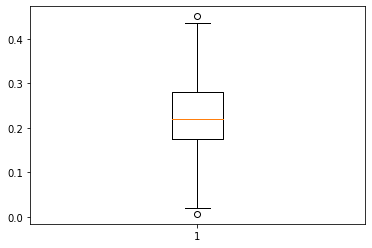

In [28]:
plt.ion()
plt.boxplot(df.spread2)
plt.pause(0.05)

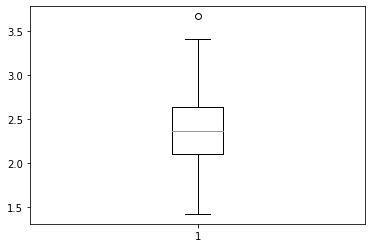

In [29]:
plt.ion()
plt.boxplot(df.d2)
plt.pause(0.05)

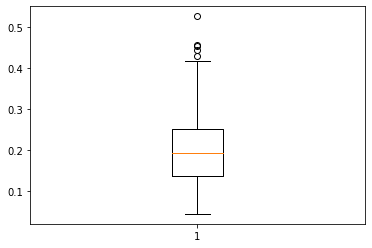

In [30]:
plt.ion()
plt.boxplot(df.ppe)
plt.pause(0.05)

### 4. Data Transformation & Feature Selection

In [31]:
# delete name column as it is not contributing to the status
del df['name']
df

,mdvp_fo,mdvp_fhi,mdvp_flo,mdvp_jitter_perc,mdvp_jitter,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [32]:
# Scaling & Normalization

for col in df.columns:
    df[col] = (df[col] - df[col].min())/(df[col].max() - df[col].min())

df.describe()

,mdvp_fo,mdvp_fhi,mdvp_flo,mdvp_jitter_perc,mdvp_jitter,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,...,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.383623,0.193841,0.292748,0.144233,0.146083,0.126513,0.135389,0.126504,0.184126,0.162080,...,0.214101,0.077019,0.546410,0.753846,0.564574,0.572963,0.412332,0.495783,0.426421,0.335549
std,0.240959,0.186761,0.250564,0.154007,0.137636,0.142956,0.147855,0.142934,0.172147,0.160129,...,0.195527,0.128652,0.179865,0.431878,0.242525,0.220456,0.197110,0.187758,0.170294,0.186649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.170220,0.066786,0.108323,0.056544,0.051383,0.047206,0.050375,0.047279,0.063584,0.052177,...,0.071222,0.016790,0.437170,1.000000,0.384375,0.400291,0.273893,0.378364,0.300658,0.192433
50%,0.351961,0.150411,0.223606,0.103558,0.090909,0.087669,0.094855,0.087494,0.122604,0.111750,...,0.158685,0.035045,0.554499,1.000000,0.558550,0.589516,0.405738,0.478618,0.417393,0.309661
75%,0.549775,0.249162,0.429160,0.180591,0.209486,0.151975,0.162647,0.151951,0.258764,0.217749,...,0.302703,0.079543,0.676034,1.000000,0.772299,0.747391,0.527720,0.614472,0.539698,0.431709
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# select only those features which are correlated to status col
threshold  =  0.3
corr_matrix = df.corr().abs()
print(corr_matrix['status'])
for col in df.columns:
    if (corr_matrix['status'][col] <  threshold):
        # if corr less than threshold, drop  column
        df. drop([col], axis=1, inplace=True) # Reduce dimensionality

print()
df.info()

mdvp_fo             0.383535
mdvp_fhi            0.166136
mdvp_flo            0.380200
mdvp_jitter_perc    0.278220
mdvp_jitter         0.338653
mdvp_rap            0.266668
mdvp_ppq            0.288698
jitter_ddp          0.266646
mdvp_shimmer        0.367430
mdvp_shimmer_db     0.350697
shimmer_apq3        0.347617
shimmer_apq5        0.351148
mdvp_apq            0.364316
shimmer_dda         0.347608
nhr                 0.189429
hnr                 0.361515
status              1.000000
rpde                0.308567
dfa                 0.231739
spread1             0.564838
spread2             0.454842
d2                  0.340232
ppe                 0.531039
Name: status, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mdvp_fo          195 non-null    float64
 1   mdvp_flo         195 non-null    float64
 2   mdvp_jitt

### 5. Train & Test data split

In [34]:
# Extract X & Y columns
X = df.drop(['status'], axis=1)
Y = df['status']

In [35]:
X = X.values
Y = Y.values

In [36]:
X

array([[0.18430827, 0.05481479, 0.24901186, ..., 0.58576513, 0.39066128,
        0.4973096 ],
       [0.19832685, 0.2783228 , 0.28853755, ..., 0.74133704, 0.47314522,
        0.67132602],
       [0.16503854, 0.26528838, 0.32806324, ..., 0.68637091, 0.40881938,
        0.59668246],
       ...,
       [0.50273036, 0.05072714, 0.28853755, ..., 0.34257652, 0.55896743,
        0.18057983],
       [0.6428929 , 0.05427936, 0.13043478, ..., 0.45288473, 0.31822198,
        0.16313677],
       [0.73327434, 0.07194837, 0.09090909, ..., 0.41509481, 0.50367281,
        0.21545975]])

In [37]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state = 323)


### 6. Train KNN model

In [39]:
# Create model
model_euclidian = KNeighborsClassifier(metric='minkowski', p=2, n_neighbors = 5) # Euclidian distance
# train model
model_euclidian.fit(train_X, train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 7. Predictions and Evaluation

In [40]:
conf_matrix = {}
MSE = {}
error_rate = {}
model_prediction = {}
def predict_and_evaluate(model, name):
    # prediction
    predictions = model.predict(test_X)
    model_prediction[name]=predictions
    error_rate[name] = np.mean(predictions != test_Y)

    #confusion matrix
    conf_matrix[name] = confusion_matrix(test_Y, predictions)
#     print(f'Confusion matrix for model: {name} \n')
#     print(conf_matrix[name])

#     print(f'\n Classification report for model: {name} \n')
#     print(classification_report(test_Y, predictions))

    MSE[name] = metrics.mean_squared_error(test_Y, predictions)
#     print(f'\n MSE for the model {name}: '+str(MSE[name]))
#     print()

In [41]:
predict_and_evaluate(model_euclidian, 'euclidian dist')

### 8. Elbow method

In [42]:
def plot_elbow(name, dist_metric, p_val, n):
    error = []
    K = range(3,n)
    for i in K:
        model_t = KNeighborsClassifier(metric=dist_metric, p=p_val, n_neighbors=i)
        model_t.fit(train_X, train_Y)
        predict_and_evaluate(model_t, name)
        error.append(error_rate[name])
        
    plt.figure(figsize=(16,8))
    plt.plot(K, error,marker='o')
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.title(f'The Elbow Method showing the optimal k for model {name}')
    plt.show()

#### Manhattan distance model

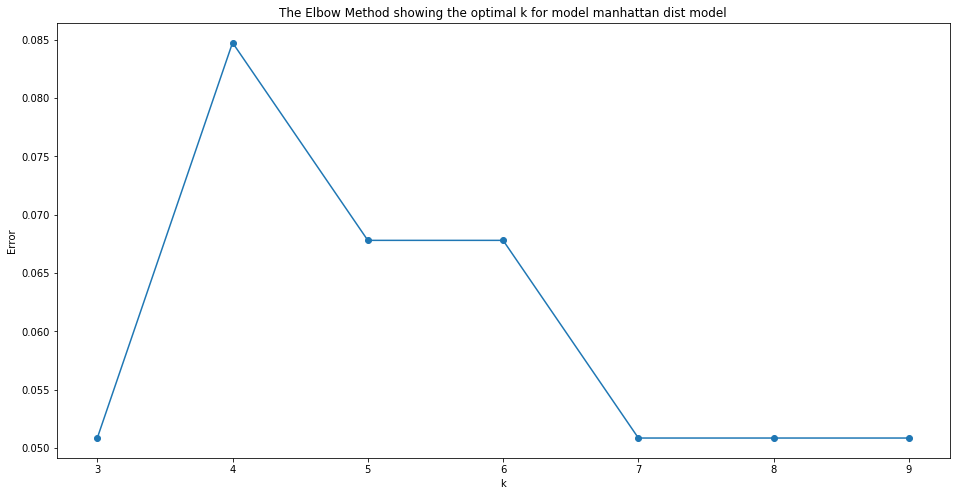

In [43]:
plot_elbow('manhattan dist model', 'minkowski', 1, 10)

##### Optimal value for manhattan distance model is n = 7 

#### Euclidian distance model

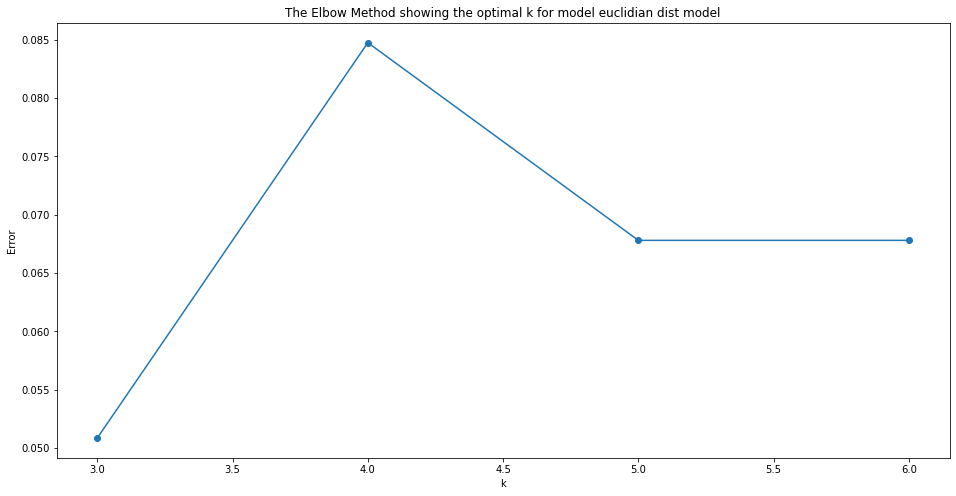

In [44]:
plot_elbow('euclidian dist model', 'euclidean', 1, 7)

#### Optimal value for euclidian distance model is n = 5

#### Chebyshev distance model

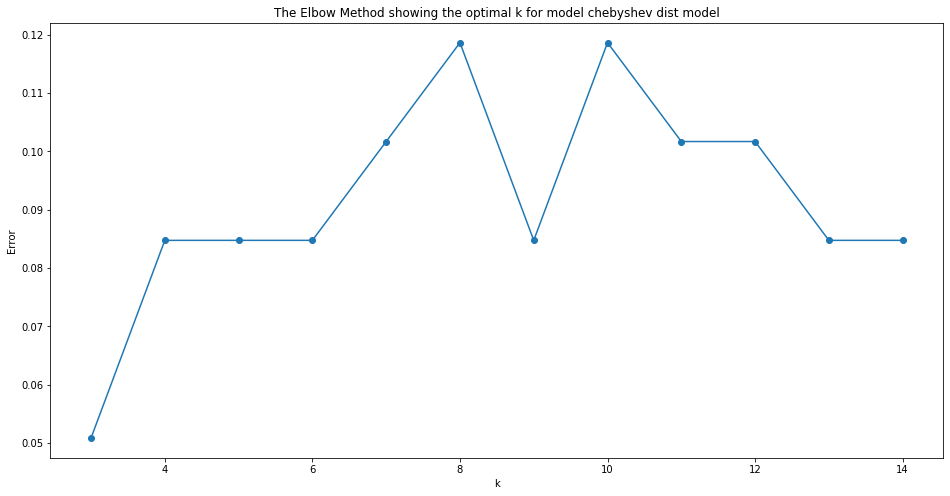

In [45]:
plot_elbow('chebyshev dist model', 'chebyshev', 1, 15)

##### Optimal value for chebyshev distance model is n = 13

### 9. Choose Distance metric

In [46]:
# from above observations
# Manhattan - optimal n=7
# Euclidian - optimal n=5
# Chebyshev - optimal n=13

In [47]:
# 1. Evaluation metric for Manhattan distance

name = 'Manhattan'
model_M = KNeighborsClassifier(metric='minkowski', p=1, n_neighbors=7)
model_M.fit(train_X, train_Y)
predict_and_evaluate(model_M, name)

print(f'Confusion matrix for model: {name} \n')
print(conf_matrix[name])

print(f'\n Classification report for model: {name} \n')
print(classification_report(test_Y, model_prediction[name]))

print(f'\n MSE for the model {name}: '+str(MSE[name]))
print()

Confusion matrix for model: Manhattan 

[[11  1]
 [ 2 45]]

 Classification report for model: Manhattan 

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88        12
         1.0       0.98      0.96      0.97        47

    accuracy                           0.95        59
   macro avg       0.91      0.94      0.92        59
weighted avg       0.95      0.95      0.95        59


 MSE for the model Manhattan: 0.05084745762711865



In [48]:
# 2. Evaluation metric for Euclidian distance

name = 'Euclidian_dist'
model_M = KNeighborsClassifier(metric='euclidean', p=2, n_neighbors=5)
model_M.fit(train_X, train_Y)
predict_and_evaluate(model_M, name)

print(f'Confusion matrix for model: {name} \n')
print(conf_matrix[name])

print(f'\n Classification report for model: {name} \n')
print(classification_report(test_Y, model_prediction[name]))

print(f'\n MSE for the model {name}: '+str(MSE[name]))
print()

Confusion matrix for model: Euclidian_dist 

[[11  1]
 [ 3 44]]

 Classification report for model: Euclidian_dist 

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85        12
         1.0       0.98      0.94      0.96        47

    accuracy                           0.93        59
   macro avg       0.88      0.93      0.90        59
weighted avg       0.94      0.93      0.93        59


 MSE for the model Euclidian_dist: 0.06779661016949153



In [49]:
# 3. Evaluation metric for Chebyshev distance

name = 'Chebyshev_dist'
model_M = KNeighborsClassifier(metric='chebyshev', p=1, n_neighbors=13)
model_M.fit(train_X, train_Y)
predict_and_evaluate(model_M, name)

print(f'Confusion matrix for model: {name} \n')
print(conf_matrix[name])

print(f'\n Classification report for model: {name} \n')
print(classification_report(test_Y, model_prediction[name]))

print(f'\n MSE for the model {name}: '+str(MSE[name]))
print()

Confusion matrix for model: Chebyshev_dist 

[[ 8  4]
 [ 1 46]]

 Classification report for model: Chebyshev_dist 

              precision    recall  f1-score   support

         0.0       0.89      0.67      0.76        12
         1.0       0.92      0.98      0.95        47

    accuracy                           0.92        59
   macro avg       0.90      0.82      0.86        59
weighted avg       0.91      0.92      0.91        59


 MSE for the model Chebyshev_dist: 0.0847457627118644



In [50]:
# From above calculations, it is clear that Manhattan distance has least MSE and highest F1 score


#### Manhattan distance is the most appropriate distance metric with least MSE and highest F1 score

### 10. Final model accuracy and evaluation metric

In [51]:
name = 'Manhattan'
model_M = KNeighborsClassifier(metric='minkowski', p=1, n_neighbors=7)
model_M.fit(train_X, train_Y)
predict_and_evaluate(model_M, name)

print(f'Confusion matrix for model: {name} \n')
print(conf_matrix[name])

print(f'\n Classification report for model: {name} \n')
print(classification_report(test_Y, model_prediction[name]))

print(f'\n MSE for the model {name}: '+str(MSE[name]))
print()

Confusion matrix for model: Manhattan 

[[11  1]
 [ 2 45]]

 Classification report for model: Manhattan 

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88        12
         1.0       0.98      0.96      0.97        47

    accuracy                           0.95        59
   macro avg       0.91      0.94      0.92        59
weighted avg       0.95      0.95      0.95        59


 MSE for the model Manhattan: 0.05084745762711865



### 11. Future Work

In [52]:
# Since we cannot identify the features responsible for classification, KNN is not the best model to choose.
# We can use diff model for feature importance